In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x_min=-1
x_max=1
steps=100
h=1
m=1

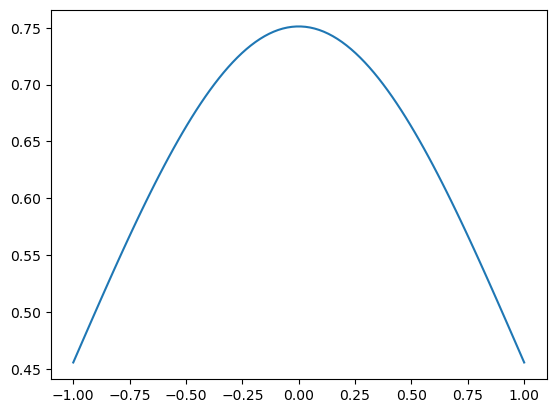

In [18]:
grid=np.linspace(x_min,x_max, steps)
psi_0=(1/np.pi**.25)*np.exp(-0.5*grid**2)
fig=plt.figure()
plt.plot(grid,psi_0)

In [19]:
print((x_max-x_min)/steps)

0.02


# Computing S_0

In [ ]:
laplacian=0;

for i in range(1,len(psi_0)-1):
    laplacian=+-h**2/(2*m)*(np.conjugate(psi_0[i])*(psi_0[i+1]-2*psi_0[i]+psi_0[i-1])*psi_0[i]/((x_max-x_min)/steps))
    print(laplacian)

4.1036894566655464e-05
8.608109955027172e-05
0.00013532182437053222
0.0001888675668875682
0.00024680997810393765
0.0003092221386240093
0.0003761568822219907
0.00044764518537047693
0.0005236946420492136
0.0006042880432794715
0.0006893820807949526
0.0007789061939804663
0.0008727615786774988
0.0009708203756621737
0.0010729250555576717
0.0011788880156827944
0.0012884914027275097
0.0014014871734222582
0.00151759740335874
0.0016365148518082482
0.0017579037881307919
0.0018814010825748619
0.0020066175618280203
0.0021331396265217143
0.0022605311253093385
0.0023883354770075837
0.0025160780293535306
0.0026432686402022027
0.002769404463875379
0.00289397292299879
0.0030164548433059424
0.0031363277267614266
0.003253069136111954
0.003366160162100525
0.003475088943138083
0.003579354205847083
0.0036784687940405133
0.0037719631532594946
0.0038593887377199824
0.003940321306790635
0.004014364078915698
0.0040811507116005116
0.0041403480778679615
0.004191658811059816
0.004234823592175285
0.00426962315631246